In [1]:
import numpy as np
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sc.set_figure_params(dpi=100, frameon=False, color_map='Reds', facecolor=None)
sc.logging.print_header()

/home/icb/yuge.ji/miniconda3/envs/test_env3/lib/python3.10/site-packages/scanpy/_settings.py:447: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  IPython.display.set_matplotlib_formats(*ipython_format)


scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.22.4 scipy==1.9.1 pandas==1.4.4 scikit-learn==1.1.2 statsmodels==0.13.2 pynndescent==0.5.7


/home/icb/yuge.ji/miniconda3/envs/test_env3/lib/python3.10/site-packages/umap/__init__.py:9: ImportWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn(


## HLCA scANVI

In [9]:
ranking_files = {
    'ablation':"ablation/task2_abs.csv",
    'de':"differential_expression/hlca_DE_cell_types.csv",
    'eg_abssum':"expected_gradients/task_2_absolute_sum_expected_grads.csv",
#     'eg_sum':"expected_gradients/task_2_sum_expected_grads.csv",
    'ig_abssum':"integrated_gradients/task_2_absolute_sum_integrated_grads.csv",
#     'ig_sum':"integrated_gradients/task_2_sum_integrated_grads.csv",
    'lime_abs':"lime/lime_absolute.csv",
    'lime':"lime/lime.csv",
    'mean':"baselines/task2_mean.csv",
    'random':"baselines/task2_random.csv",
}

# ranking_dfs = {explainer: pd.read_csv(path + file_name, index_col=0) for explainer, file_name in ranking_files.items()}
# ranking_dfs['de'] = -ranking_dfs['de']

In [2]:
# adata_hlca = sc.read("../datasets/hlca.h5ad")

In [31]:
# methods_to_paths = {
# #     "wilcoxon_DE": "differential_expression/ginis_hlca_DE_cell_types.csv",
#     "absolute_sum_expected_gradients": "expected_gradients/ginis_task_2_absolute_sum_expected_grads.csv",
#     "sum_expected_gradients": "expected_gradients/ginis_task_2_sum_expected_grads.csv",
#     "absolute_sum_integrated_gradients": "integrated_gradients/ginis_task_2_absolute_sum_integrated_grads.csv",
#     "sum_integrated_gradients": "integrated_gradients/ginis_task_2_sum_integrated_grads.csv",
#     "lime_absolute": "lime/ginis_lime_absolute.csv",
#     "lime": "lime/ginis_lime.csv",
# #     "random": "random/ginis_task2_random.csv",
# #     "mean": "random/ginis_task2_random.csv",
# #     "ablation": "ablation/ginis_task2.csv"
# }

In [14]:
df_dict = {method: pd.read_csv(f"../outputs/{path.split('/')[0]}/ginis_{path.split('/')[1]}") for method, path in ranking_files.items()}

In [41]:
gini_df = pd.concat(df_dict.values()).drop(labels=['unlabeled'], axis=1)
gini_df.index = df_dict.keys()
gini_df = gini_df.dropna(axis=1)

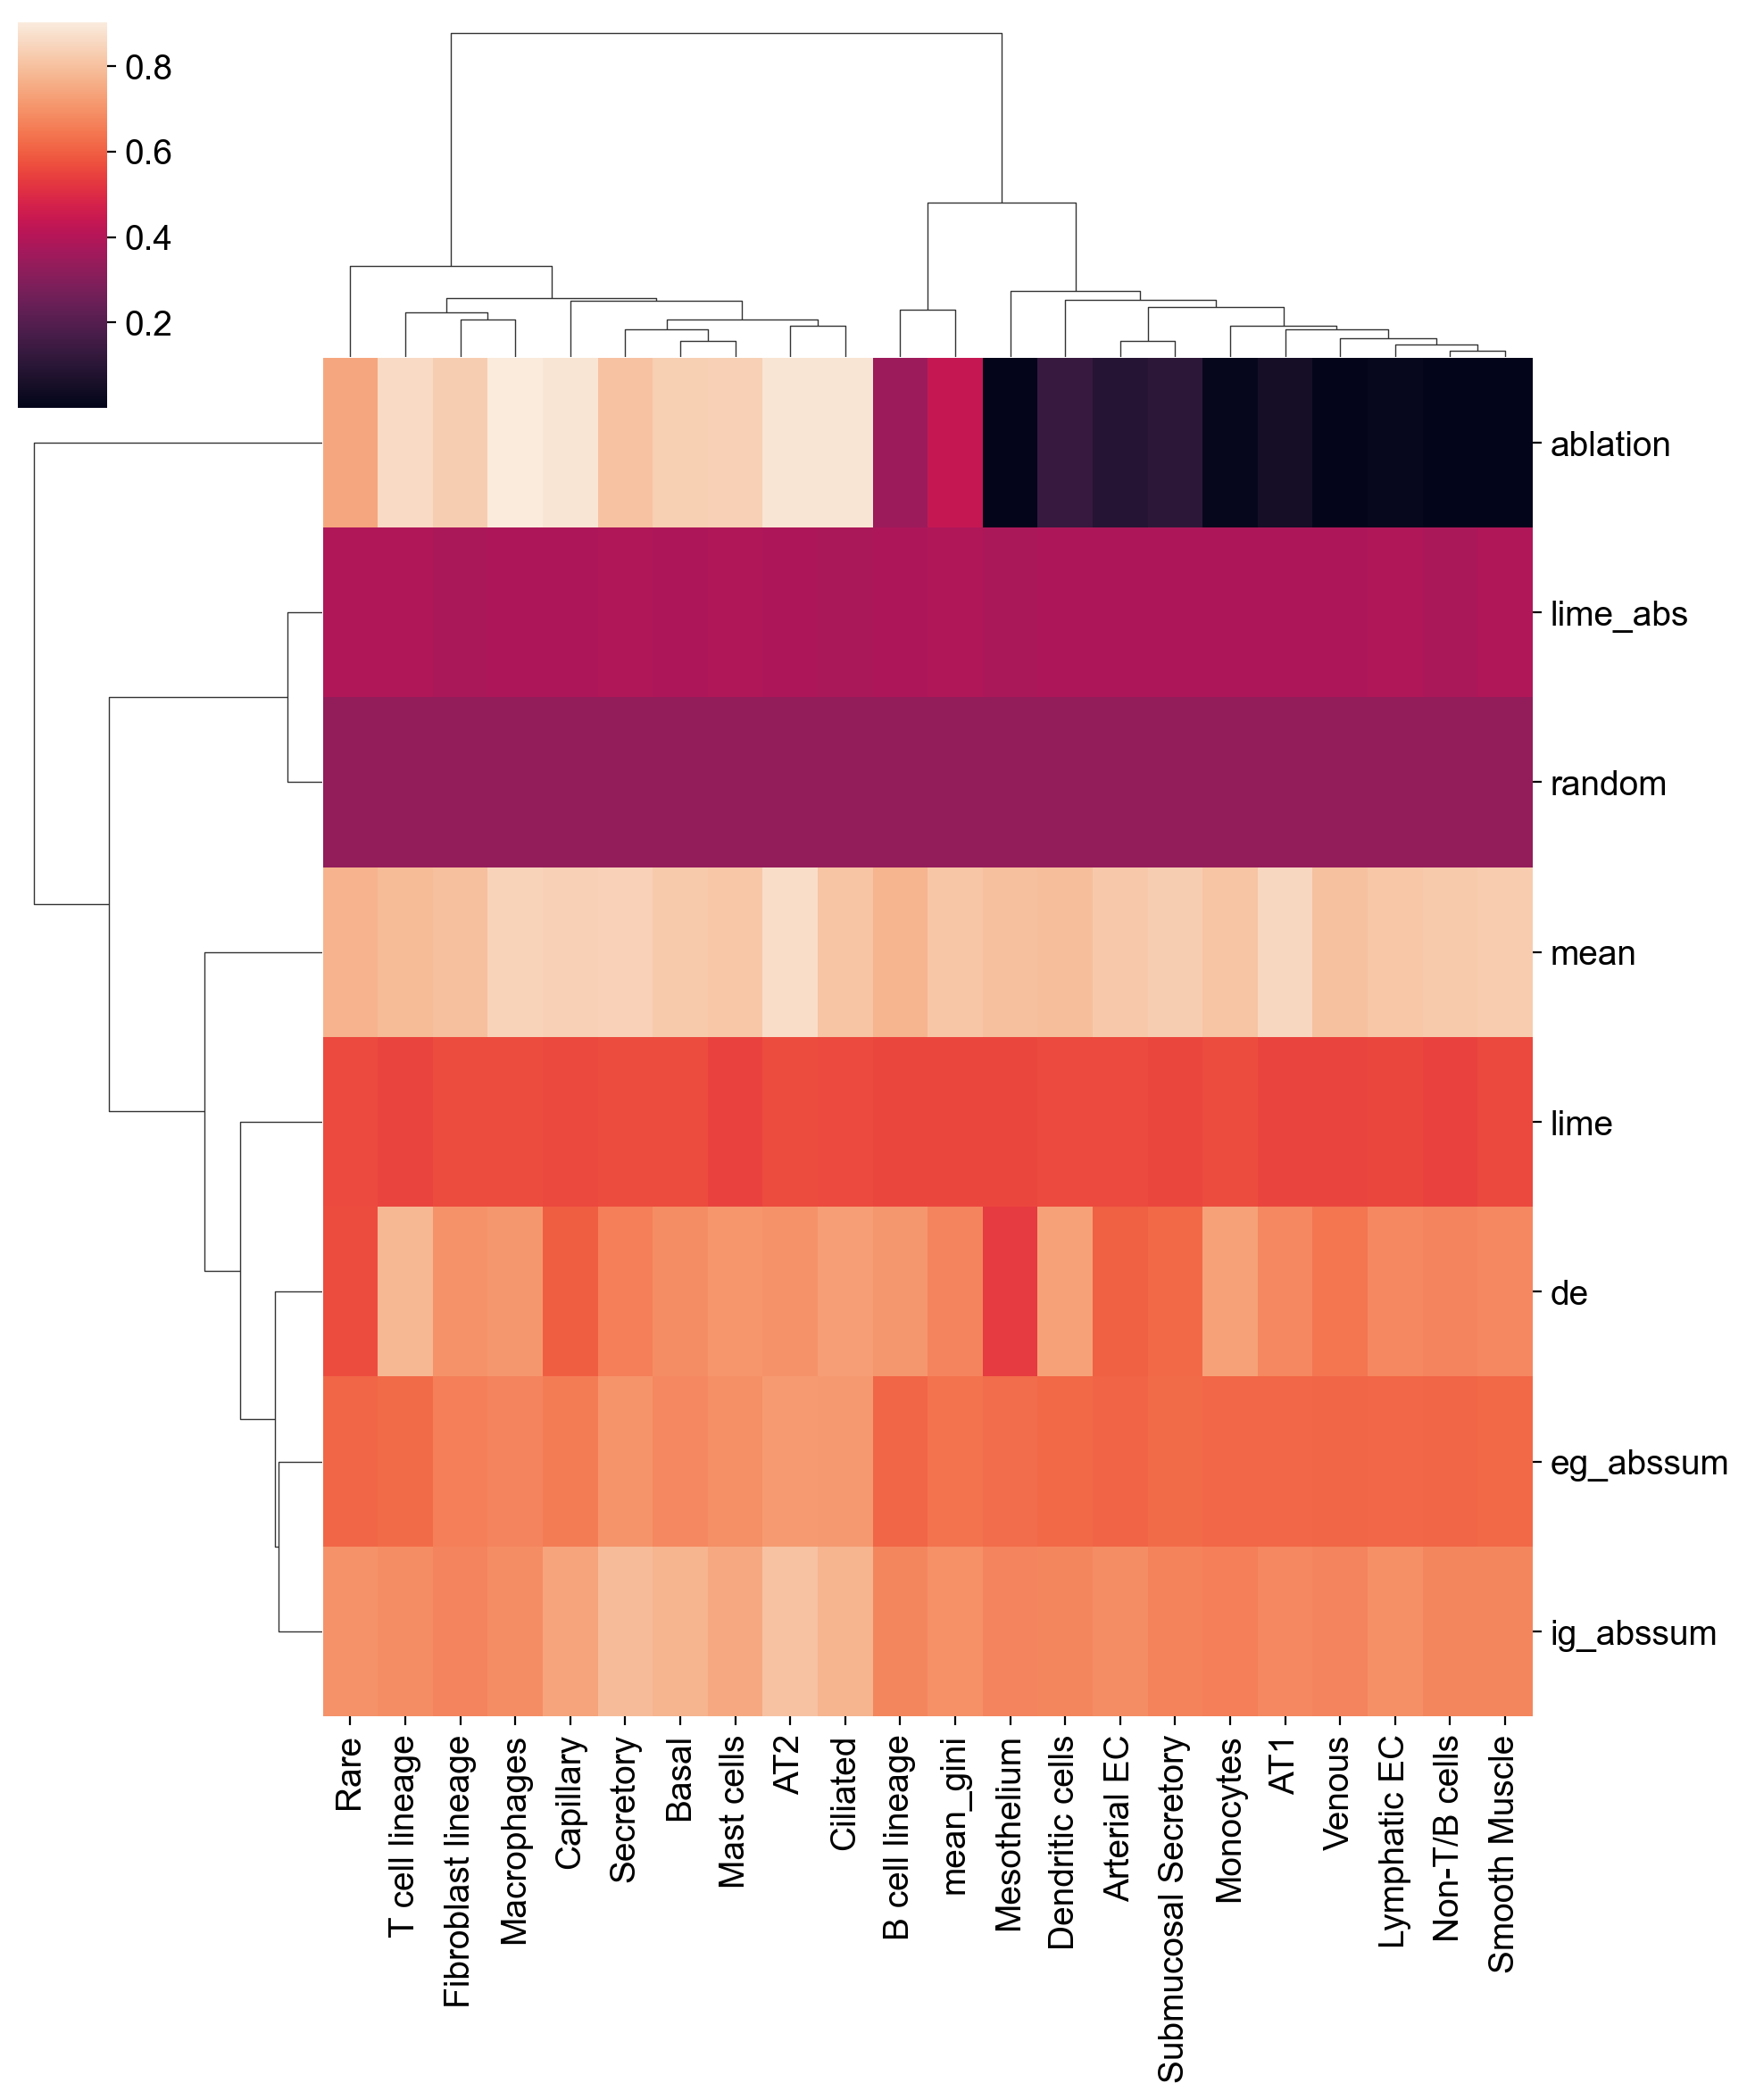

In [47]:
sns.clustermap(gini_df, figsize=(10, 12))

/home/icb/yuge.ji/miniconda3/envs/test_env3/lib/python3.10/site-packages/seaborn/matrix.py:306: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  mesh = ax.pcolormesh(self.plot_data, cmap=self.cmap, **kws)


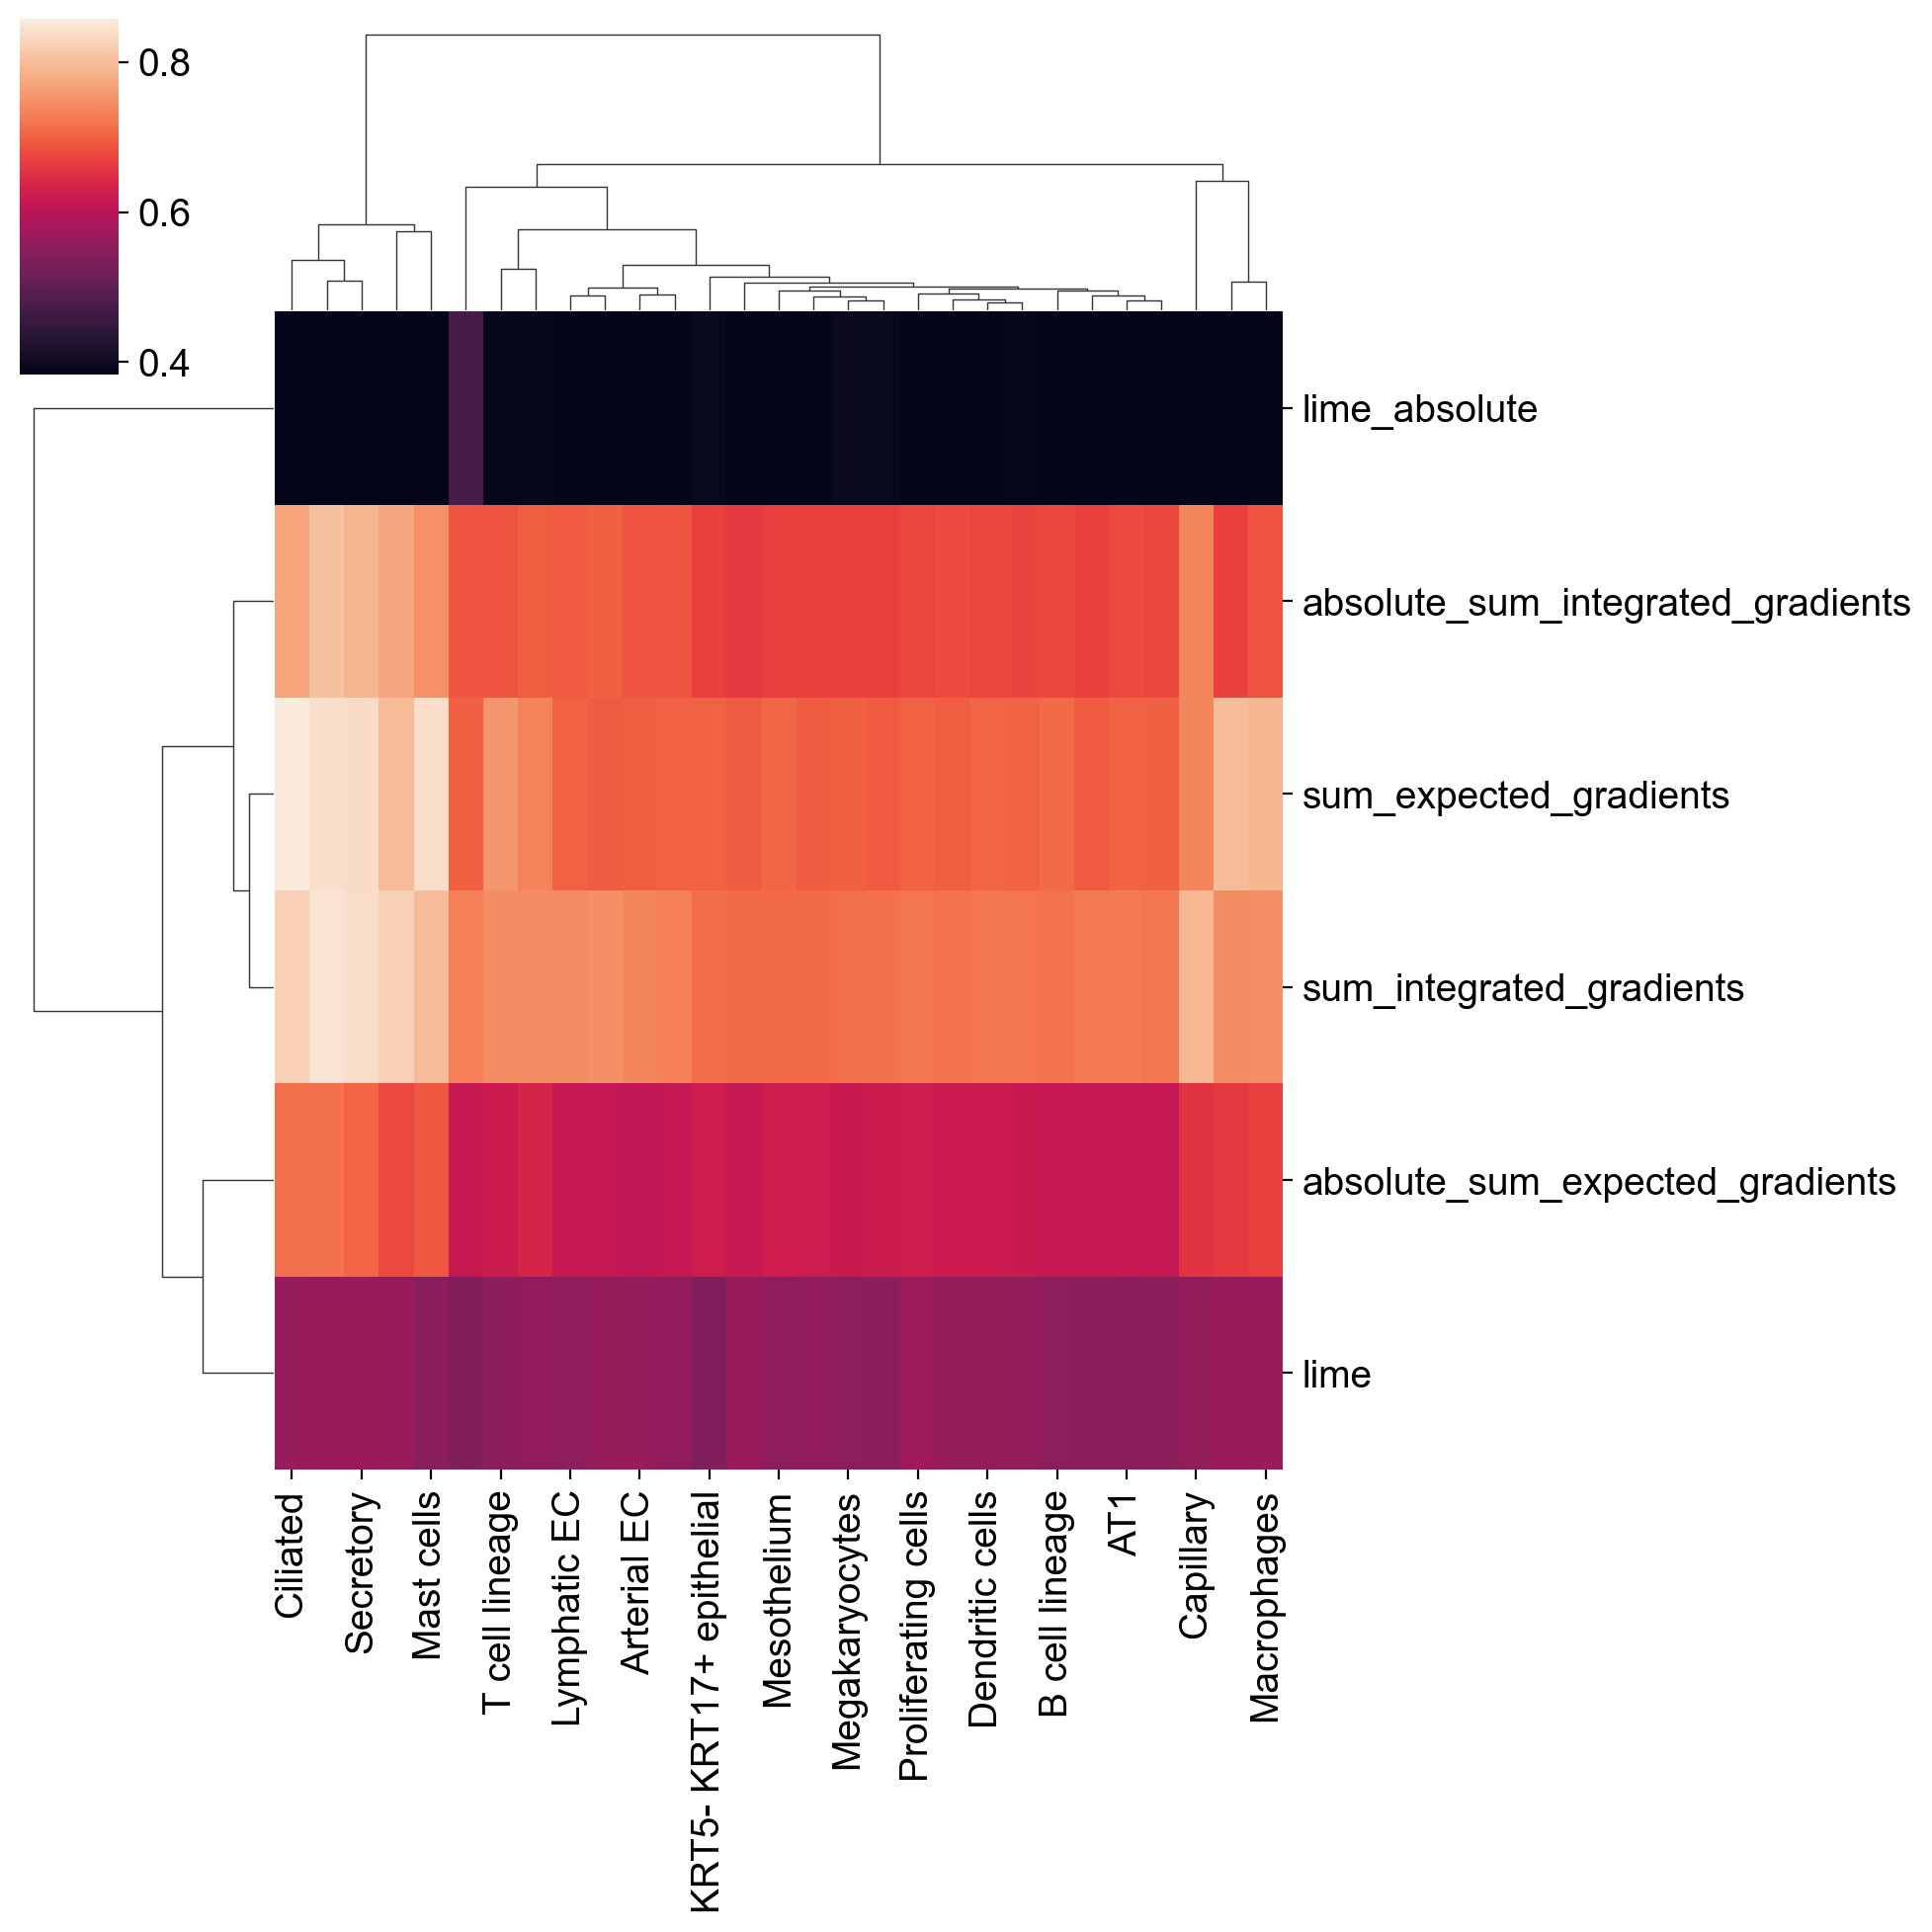

In [44]:
sns.clustermap(gini_df)